In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("C:/New folder/last_books.csv")
data

,id,book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2792775,272,439023483.0,9.780440e+12,Suzanne Collins,2008,The Hunger Games,The Hunger Games The Hunger Games 1,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,4640799,491,439554934.0,9.780440e+12,JK Rowling Mary GrandPr,1997,Harry Potter and the Philosophers Stone,Harry Potter and the Sorcerers Stone Harry Pot...,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,3212258,226,316015849.0,9.780320e+12,Stephenie Meyer,2005,Twilight,Twilight Twilight 1,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,3275794,487,61120081.0,9.780060e+12,Harper Lee,1960,To Kill a Mockingbird,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,245494,1356,743273567.0,9.780740e+12,F Scott Fitzgerald,1925,The Great Gatsby,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,9996,7130616,7392860,19,441019455.0,9.780440e+12,Ilona Andrews,2010,Bayou Moon,Bayou Moon The Edge 2,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9952,9997,208324,1084709,19,748335355.7,9.780680e+12,Robert A Caro,1990,Means of Ascent,Means of Ascent The Years of Lyndon Johnson 2,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9953,9998,77431,2393986,60,748335355.7,9.780390e+12,Patrick OBrian,1977,The Mauritius Command,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9954,9999,8565083,13433613,7,61711527.0,9.780060e+12,Peggy Orenstein,2011,Cinderella Ate My Daughter Dispatches from the...,Cinderella Ate My Daughter Dispatches from the...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [7]:
data.describe()

,id,book_id,work_id,books_count,isbn,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,9956.000000,9.956000e+03,9.956000e+03,9956.000000,9.956000e+03,9.956000e+03,9956.000000,9956.000000,9.956000e+03,9.956000e+03,9956.000000,9956.000000,9956.000000,9956.000000,9.956000e+03,9.956000e+03
mean,4993.580153,5.244037e+06,8.624498e+06,76.008337,7.419979e+08,9.755330e+12,1986.230112,4.003191,5.417073e+04,5.987616e+04,2924.117316,1346.835376,3118.058558,11511.224387,2.003168e+04,2.386836e+04
std,2885.396498,7.574379e+06,1.175265e+07,170.788035,8.706054e+08,4.291984e+11,113.539304,0.253449,1.576950e+05,1.681482e+05,6136.897741,6649.987779,9737.681885,28604.084729,5.155069e+04,7.993553e+04
min,1.000000,1.000000e+00,8.700000e+01,1.000000,1.713221e+06,1.951703e+08,-750.000000,2.470000,2.716000e+03,6.323000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2494.750000,4.608850e+04,1.007436e+06,23.000000,3.454843e+08,9.780310e+12,1990.000000,3.850000,1.358475e+04,1.546850e+04,692.000000,196.000000,656.000000,3119.000000,5.423750e+03,5.344000e+03
50%,4993.500000,3.896950e+05,2.695332e+06,40.000000,6.098076e+08,9.780450e+12,2004.000000,4.020000,2.121350e+04,2.391200e+04,1401.000000,391.000000,1163.000000,4899.500000,8.295000e+03,8.860000e+03
75%,7489.250000,9.296772e+06,1.446700e+07,67.000000,7.783038e+08,9.780810e+12,2011.000000,4.180000,4.116475e+04,4.609175e+04,2745.500000,884.000000,2358.000000,9315.750000,1.611525e+04,1.734875e+04
max,10000.000000,3.328864e+07,5.639960e+07,3455.000000,9.993912e+09,9.790010e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [5]:
data.shape

(9956, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9956 entries, 0 to 9955
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9956 non-null   int64  
 1   book_id                    9956 non-null   int64  
 2   work_id                    9956 non-null   int64  
 3   books_count                9956 non-null   int64  
 4   isbn                       9956 non-null   float64
 5   isbn13                     9956 non-null   float64
 6   authors                    9956 non-null   object 
 7   original_publication_year  9956 non-null   int64  
 8   original_title             9956 non-null   object 
 9   title                      9956 non-null   object 
 10  language_code              9956 non-null   object 
 11  average_rating             9956 non-null   float64
 12  ratings_count              9956 non-null   int64  
 13  work_ratings_count         9956 non-null   int64

C:\Users\islam\AppData\Local\Temp\ipykernel_11508\817340881.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


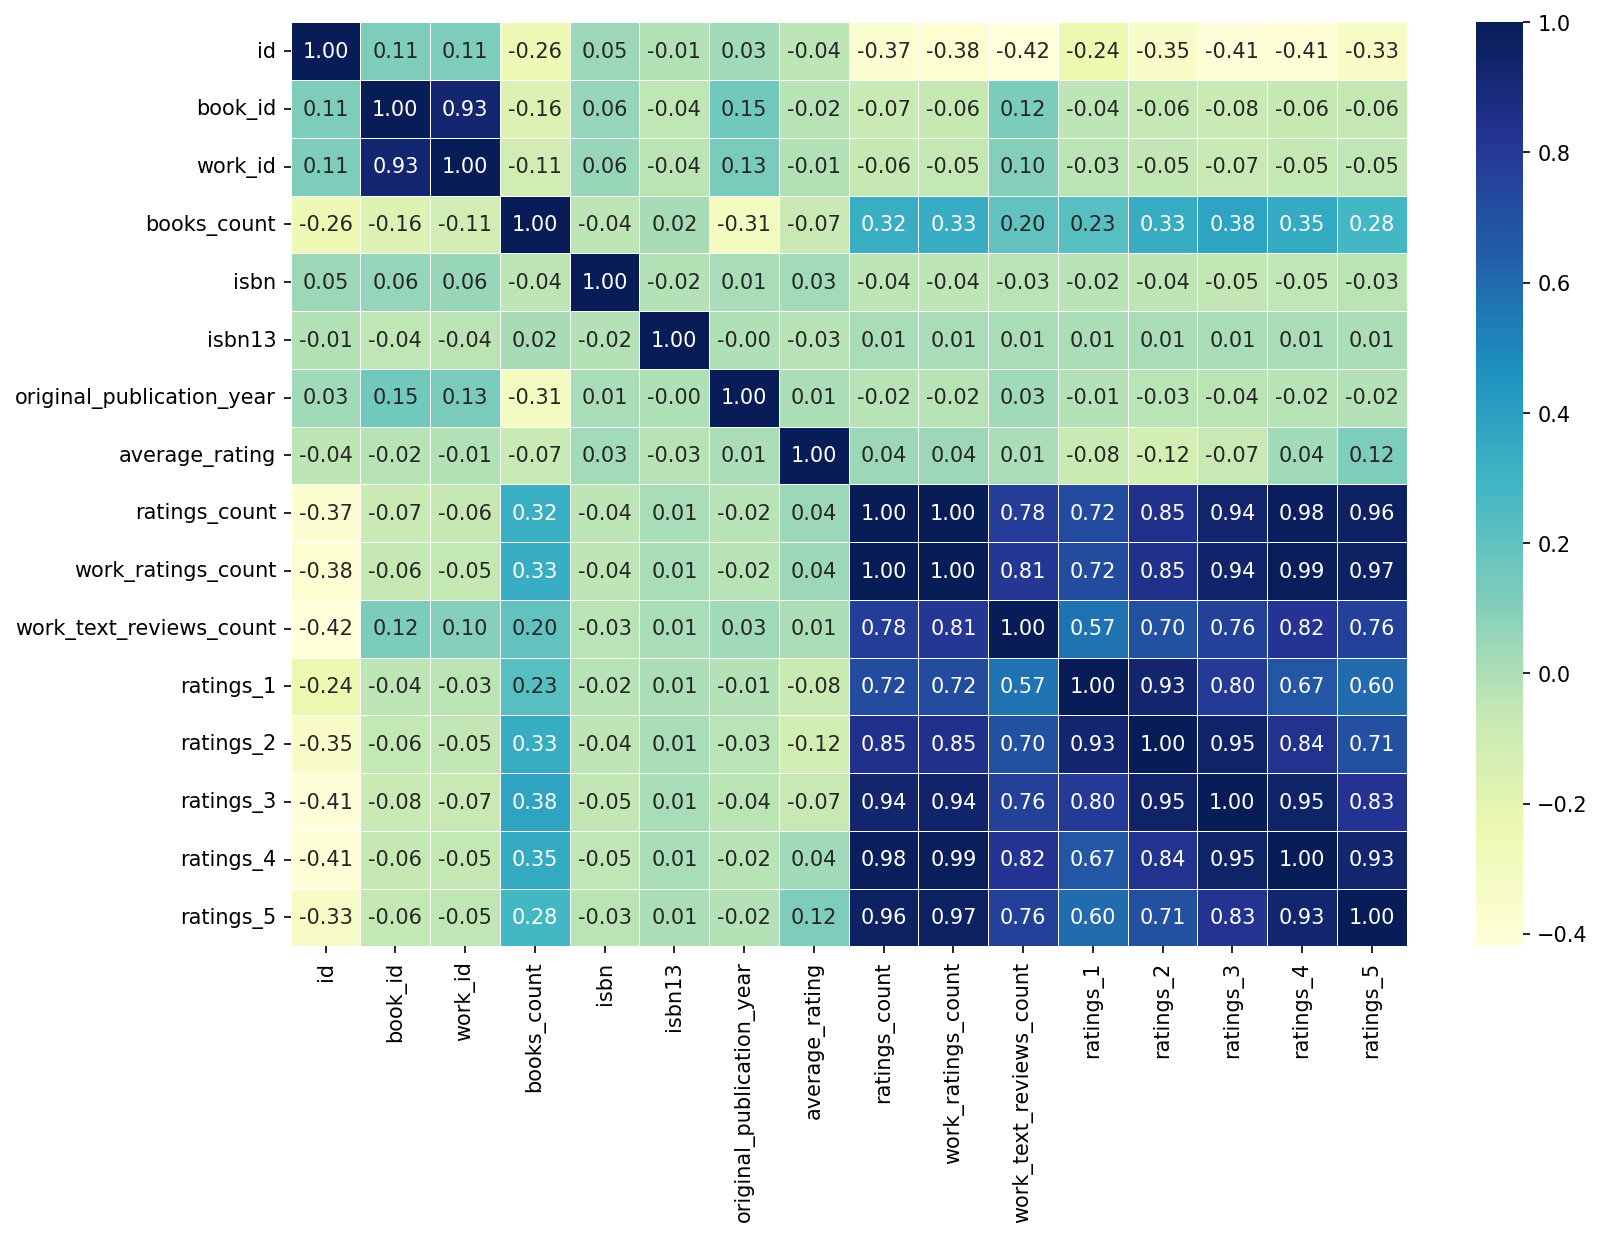

In [8]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12,8), dpi=150)
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.4, fmt='.2f', cmap='YlGnBu')

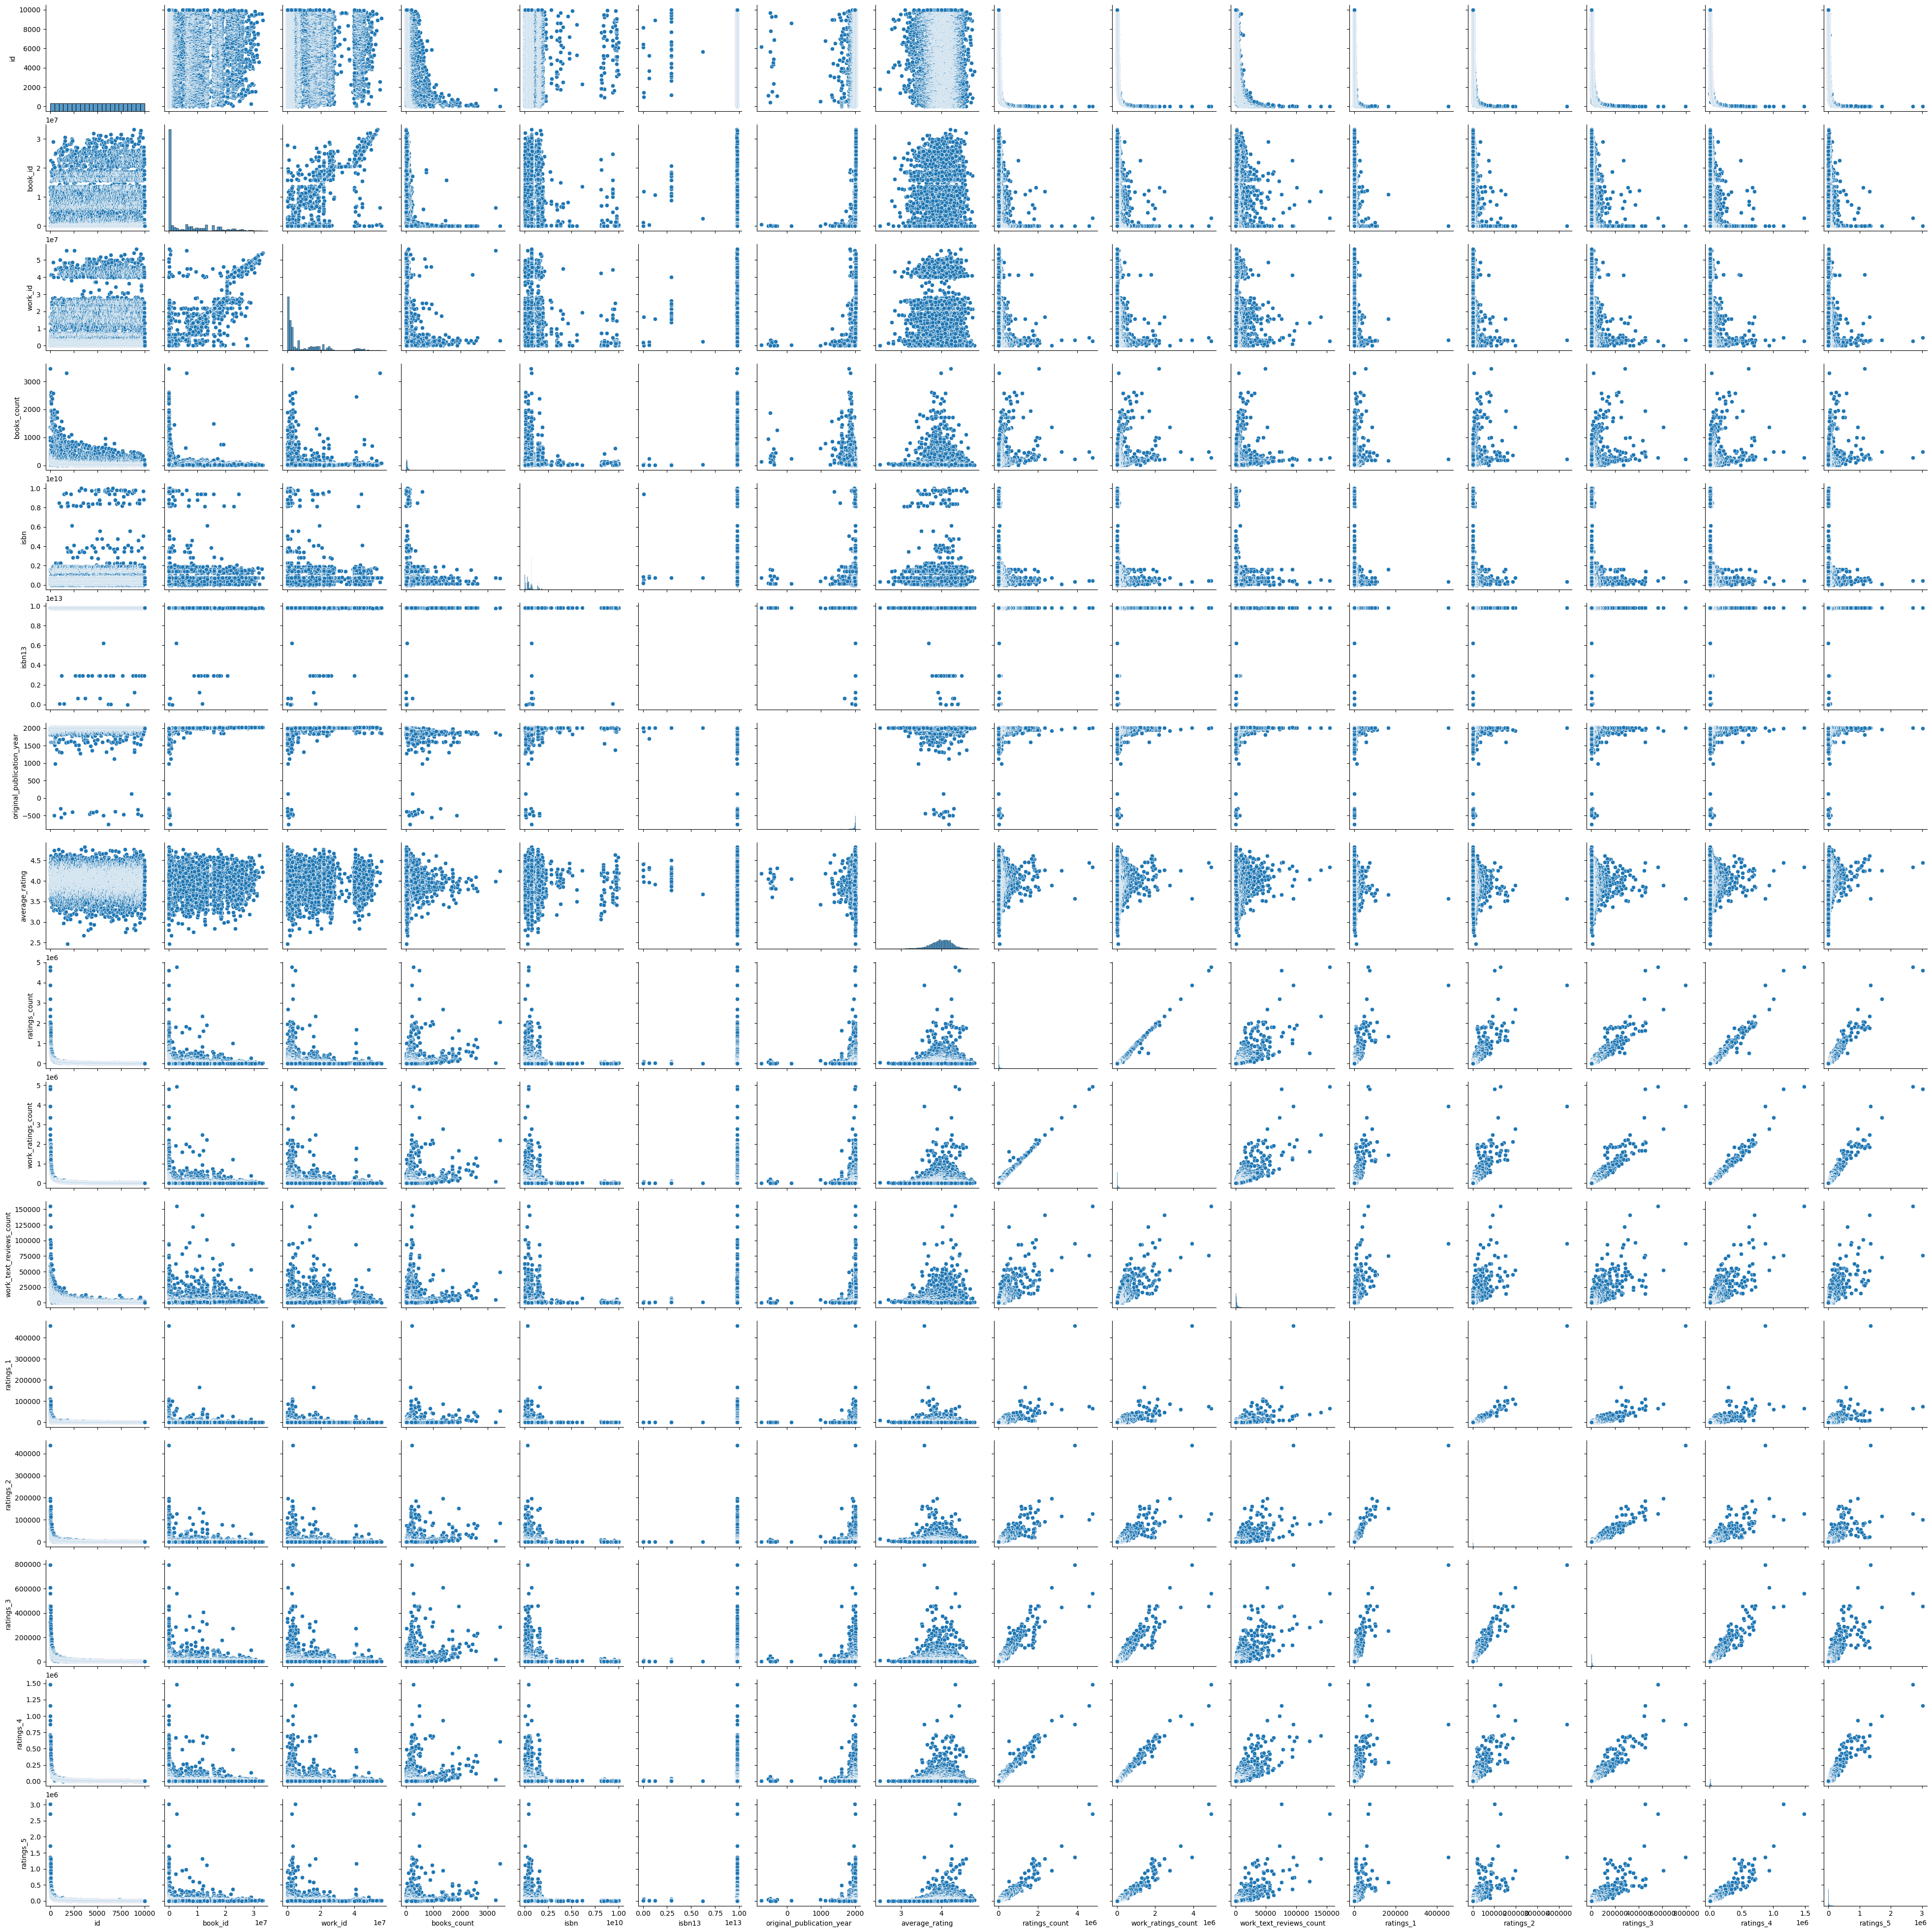

In [10]:
sns.pairplot(data)

In [22]:
le = LabelEncoder()
encoded_series = data[data.columns[:]].apply(le.fit_transform)
encoded_series

,id,book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,0,6189,5072,265,3619,48,4228,267,6862,7394,...,8968,9014,4574,2607,4099,6950,7734,8074,5956,5956
1,1,2,6141,401,3658,48,1874,256,2814,2966,...,8967,9013,4564,2611,4091,6947,7733,8075,6334,6334
2,2,2340,5642,224,1961,36,4159,264,8565,9313,...,8966,9012,4569,2621,4110,6952,7730,8072,3472,3472
3,3,198,5757,400,513,19,1657,219,8449,9173,...,8965,9011,4562,2605,4095,6945,7732,8073,3512,3512
4,4,350,1057,553,5581,75,1356,184,6725,7237,...,8964,9010,4546,2614,4109,6951,7731,8059,6531,6531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,9951,6981,6859,18,3854,48,1797,269,839,836,...,3212,3089,1138,89,447,1753,3064,2553,591,591
9952,9952,4328,2672,18,5726,69,3759,249,3959,4156,...,1685,1148,362,287,423,358,356,2658,6640,6640
9953,9953,3086,4634,59,5726,43,3472,236,7228,7821,...,504,387,341,0,17,101,845,1669,6075,6075
9954,9954,7362,7286,6,630,19,3516,270,1372,1437,...,1184,824,1878,259,871,1933,1068,210,238,238


In [23]:
x_data = encoded_series[encoded_series.columns[:-3]]
x_data

,id,book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4
0,0,6189,5072,265,3619,48,4228,267,6862,7394,6,140,8968,9014,4574,2607,4099,6950,7734
1,1,2,6141,401,3658,48,1874,256,2814,2966,6,150,8967,9013,4564,2611,4091,6947,7733
2,2,2340,5642,224,1961,36,4159,264,8565,9313,5,63,8966,9012,4569,2621,4110,6952,7730
3,3,198,5757,400,513,19,1657,219,8449,9173,6,131,8965,9011,4562,2605,4095,6945,7732
4,4,350,1057,553,5581,75,1356,184,6725,7237,6,95,8964,9010,4546,2614,4109,6951,7731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,9951,6981,6859,18,3854,48,1797,269,839,836,6,115,3212,3089,1138,89,447,1753,3064
9952,9952,4328,2672,18,5726,69,3759,249,3959,4156,6,131,1685,1148,362,287,423,358,356
9953,9953,3086,4634,59,5726,43,3472,236,7228,7821,6,141,504,387,341,0,17,101,845
9954,9954,7362,7286,6,630,19,3516,270,1372,1437,6,71,1184,824,1878,259,871,1933,1068


In [24]:
y_data = encoded_series[encoded_series.columns[-3]]
y_data

0       8074
1       8075
2       8072
3       8073
4       8059
        ... 
9951    2553
9952    2658
9953    1669
9954     210
9955     466
Name: ratings_5, Length: 9956, dtype: int64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15)

print(f"X_train shape: {x_train.shape} \nY_train shape: {y_train.shape} \n\
X_test shape: {x_test.shape} \nY_test shape: {y_test.shape} \n")

X_train shape: (8462, 19) 
Y_train shape: (8462,) 
X_test shape: (1494, 19) 
Y_test shape: (1494,) 



In [27]:
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

print(f"X_train_normalized Shape: {x_train_norm.shape}\nX_test_normalized Shape: {x_test_norm.shape}")

X_train_normalized Shape: (8462, 19)
X_test_normalized Shape: (1494, 19)


In [28]:
def fit_score_func(models, x_train, x_test, y_train, y_test):
    
    models_mse = {}
    
    for model, algorithm in models.items():
        
        algorithm.fit(x_train, y_train)
        
        y_pred = algorithm.predict(x_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        models_mse[model] = [mse,r2]
        
    return models_mse

In [29]:
models = {
         "Linear Regressor": LinearRegression(),
         "Logistic Regressor": LogisticRegression(),
         "SVM Regressor": SVC(),
         "RandomForest Regressor": RandomForestRegressor()
         }

models_scores = fit_score_func(models, x_train, x_test, y_train, y_test)

models_scores

C:\Users\islam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear Regressor': [135632.24403683105, 0.9745530090040251],
 'Logistic Regressor': [859590.8688085676, 0.8387256566155907],
 'SVM Regressor': [3481025.0515394914, 0.346898565511943],
 'RandomForest Regressor': [25797.19815568942, 0.9951599925677632]}

In [30]:
comparison_df = pd.DataFrame(models_scores, index=["MSE", "R2"])
comparison_df

,Linear Regressor,Logistic Regressor,SVM Regressor,RandomForest Regressor
MSE,135632.244037,859590.868809,3.481025e+06,25797.198156
R2,0.974553,0.838726,3.468986e-01,0.995160


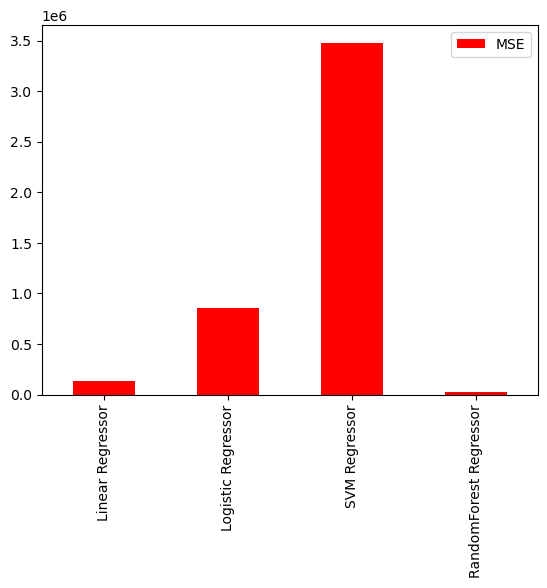

In [31]:
comparison_df.loc['MSE'].T.plot.bar(color='red')
plt.legend()

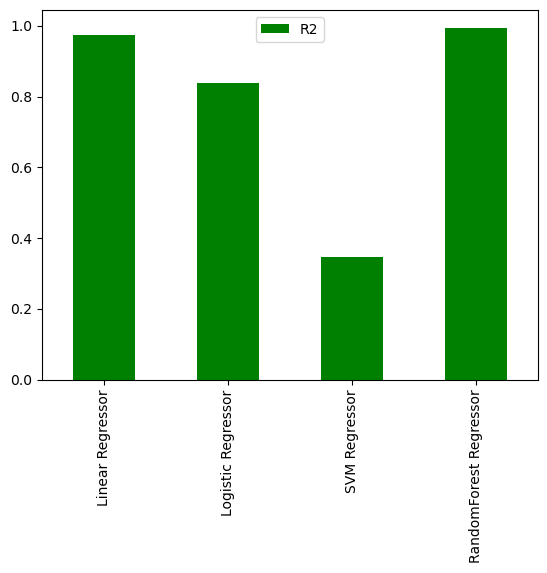

In [32]:
comparison_df.loc['R2'].T.plot.bar(color='green')
plt.legend()